## Import libraries

In [3]:
# Import analysis and visialization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [5]:
# Create Path
path=r'C:\Users\Oksana Stepanova\OneDrive\Документи\Instacart Basket Analysis'

In [6]:
# Import combined Orders-Products-Customers dataframe
df_instacart=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

In [9]:
# Check for imported data
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_prior_order,order_frequency_flag,gender,states,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
df_instacart.shape

(32399732, 31)

In [11]:
df_instacart.dtypes

order_id                     int32
user_id                      int32
order_number                 int16
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float64
first_order                   bool
product_id                   int32
add_to_cart_order            int16
reordered                     int8
product_name                object
aisle_id                     int16
department_id                 int8
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_slowest_days        object
busiest_period_of_day       object
max_order                    int16
loyalty_flag                object
average_spending           float64
spender_flag                object
median_days_prior_order    float64
order_frequency_flag        object
gender                      object
states                      object
age                           int8
date_joined                 object
number_dependants   

## Creating a bar chart for orders by day of week

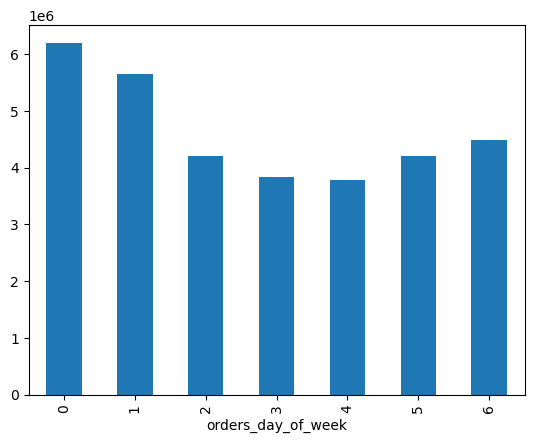

In [17]:
# Create a bar chart for orders by day of week
bar_dow=df_instacart['orders_day_of_week'].value_counts().sort_index().plot.bar()

### Observations: The busiest days of the week are Saturday, Sunday and Friday. The least busy days are Tuesday and Wednesday.

In [21]:
# Export the bar chart for orders by day of week
bar_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Creating a histogram for prices

In [32]:
# Import warnings
import warnings

In [33]:
# Remove warnings
warnings.filterwarnings("ignore")

<Axes: ylabel='Frequency'>

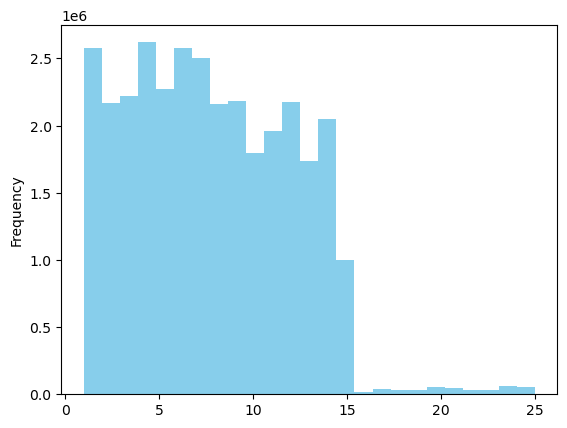

In [97]:
# Create a histogram for prices column
df_instacart['prices'].plot.hist(bins=25, color='skyblue')

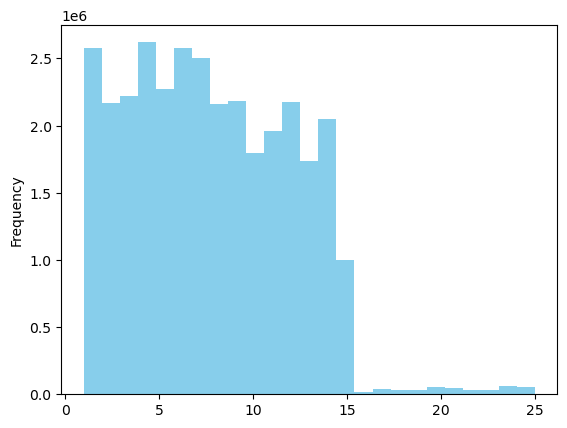

In [99]:
hist_prices=df_instacart['prices'].plot.hist(bins=25, color='skyblue')

In [100]:
# Export histogram for prices
hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## Creating a scatterplot for prices

<Axes: xlabel='prices', ylabel='prices'>

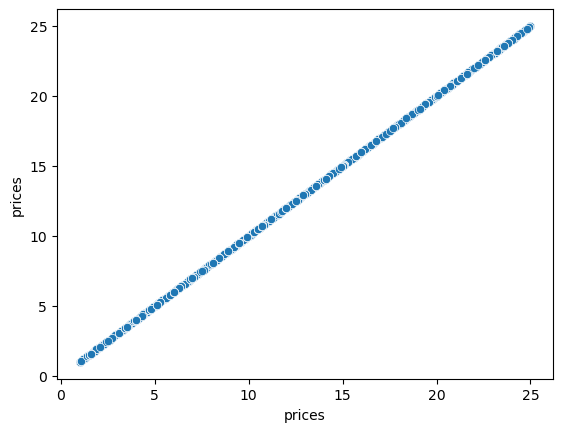

In [46]:
# Create a scatterplot for prices
sns.scatterplot(x='prices', y='prices', data=df_instacart)

## Creating a line chart for prices by day of week

In [49]:
# set the seed
np.random.seed(4)

In [50]:
# Creat a new list 'dev'
dev = np.random.rand(len(df_instacart)) <= 0.7

In [51]:
dev

array([False,  True, False, ..., False,  True,  True])

In [52]:
# Store 70% of sample in the dataframe 'big'
big=df_instacart[dev]

In [54]:
# Store 30% of sample in the dataframe 'small'
small=df_instacart[~dev]

In [55]:
len(big)+len(small)

32399732

In [57]:
# Create a new dataframe contaning 'prices' and 'orders_day_of_week' from 'small' subset
df_2=small[['orders_day_of_week', 'prices']]

In [58]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


In [59]:
df_2.shape

(9719609, 2)

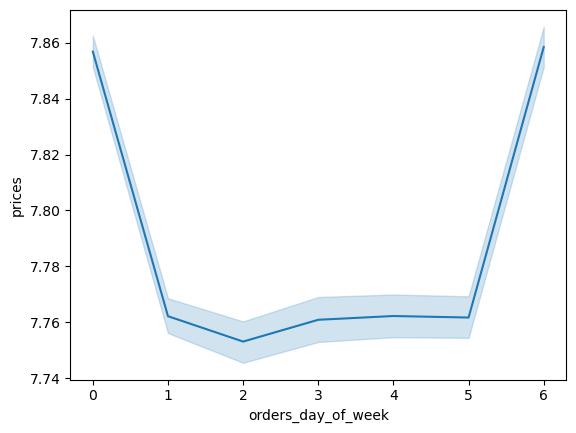

In [60]:
# Create a line chart for prices by day of week
line_prices_dow=sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

In [61]:
line_prices_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))

## Creating a histogram for orders by hour of the day

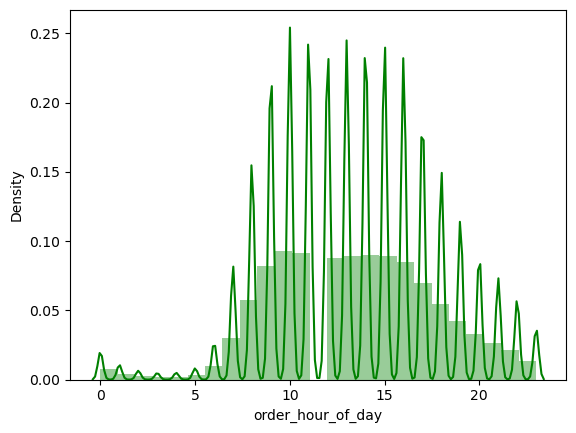

In [64]:
# Create a a histogram for orders by hour of the day with seaborn
hist_ords_hod=sns.distplot(df_instacart['order_hour_of_day'], color='green', bins=25)

In [66]:
# Export histogram for orders by hour of the day
hist_ords_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hour_of_day.png'))

In [68]:
# Check for frequency of orders by the hour of the day
df_instacart['order_hour_of_day'].value_counts(dropna=False)

order_hour_of_day
10    2761333
11    2735694
14    2688728
15    2661718
13    2660570
12    2618104
16    2534744
9     2453842
17    2087273
8     1717863
18    1636226
19    1258076
20     976000
7      890923
21     795528
22     634159
23     402272
6      290450
0      218742
1      115683
5       87944
2       69360
4       53232
3       51268
Name: count, dtype: int64

### Observations: the busiest hours of the day when the customers place the most orders are from 10 am to 3 pm. Fter 3 pm the number of orders starts gradually decreasing. The least number of orders are made by customers between midnight and 5 am.   

## Creating a bar chart of counting orders by curtomers loyalty 

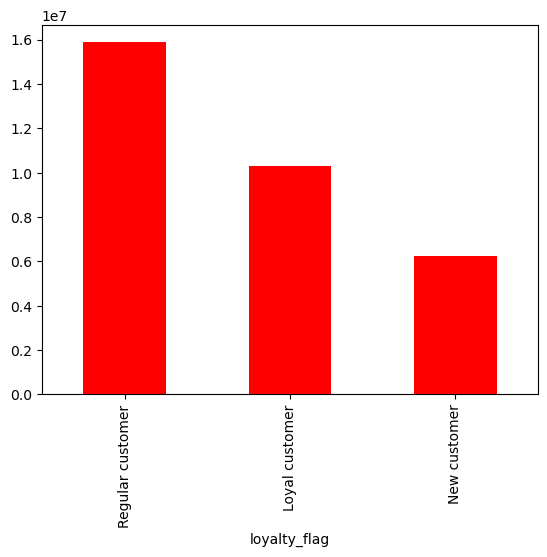

In [73]:
# Create a bar chart to count orders by customers loyalty
bar_loyal=df_instacart['loyalty_flag'].value_counts().plot.bar(color='red')

### Observations: The most orders are made by the customers we ranked as regular clients those who made more than 10 but less or equal to 40 orders. The loyal clients, who placed more than 40 orders, placed 40% fewer orders than regular customers.  

In [74]:
# Export the bar chart of counting orders by customers loyalty
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_loyalty.png'))

## Creating a line chart for prices by hour of the day

In [76]:
# Create a new dataframe contaning 'prices' and 'order_hour_of_day' from 'small' subset
df_3=small[['order_hour_of_day', 'prices']]

In [77]:
df_3.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


In [78]:
df_3.shape

(9719609, 2)

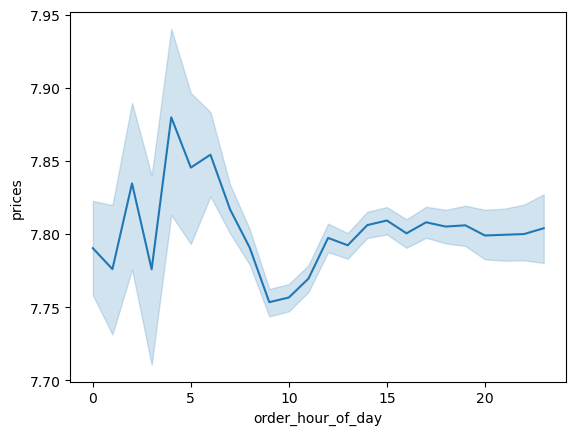

In [79]:
# Create a line chart for prices by hour of the day using a subset containing 30% of rows
line_prices_hod=sns.lineplot(data=df_3, x='order_hour_of_day', y='prices')

### Observations: Although customers place fewer orders in the early hours, they tend to buy more expensive items between midnight and 5 am. During the hours when customers place the most orders between 10 am and 3 pm, they tend to buy goods at moderate prices.

In [81]:
# Export the line chart of prices by hour of the day
line_prices_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hod.png'))

## Creating a line chart of customers' age and number of dependants 

In [83]:
# Create a new dataframe contaning 'age' and 'number_dependants' from 'small' subset
df_4=small[['age', 'number_dependants']]

In [84]:
df_4.head()

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


In [85]:
df_4.shape

(9719609, 2)

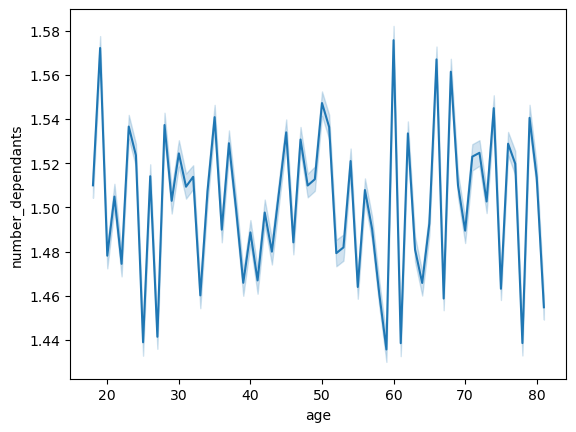

In [86]:
line_age_depnt=sns.lineplot(data=df_4, x='age', y='number_dependants')

### Observations: The line chart shows that there is no strong correlation between the client age and the number of defendant family members. Another option of looking into connections between age and customers’ family situation could be calculate the average number of dependants per an age group combining them by 10-year age groups, e.g. 21-30 y.o., 31-40 y.o etc.

In [90]:
# Export the line chart of connection between customers' age and the number of dependants in their families
line_age_depnt.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

## Creating a scatterplot of connection between the customers' age and income

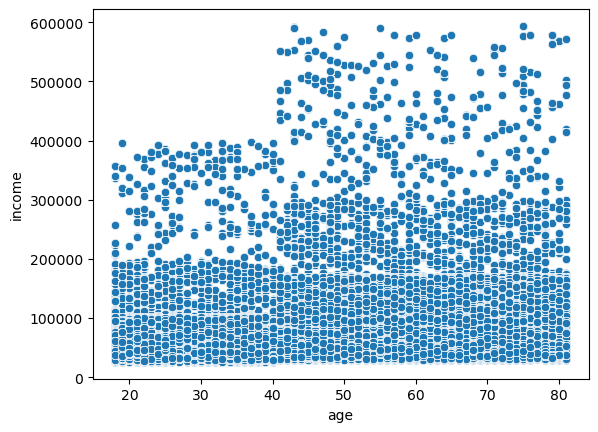

In [93]:
scatterplot_age_income=sns.scatterplot(x='age', y='income', data=df_instacart)

### Observations: Customers with incomes up to 200k are largely present in all age groups. In the age group of 20-40 years old far fewer clients get income higher than 200k and none of them have declared that they earn more than 400k. Many more customers of 40 years and older have income from 200 to 300k in comparison with younger customers. Fewer clients reported their income higher than 400k and they belong to the age group of 40 years and older.     

In [95]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

In [101]:
df_instacart.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_spending,median_days_prior_order,age,number_dependants,income
count,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.032399e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07,3.239973e+07
mean,1.710746e+06,1.029367e+05,1.714260e+01,2.738865e+00,1.342514e+01,1.110395e+01,2.559904e+04,8.352604e+00,5.895835e-01,7.119081e+01,9.918830e+00,7.790994e+00,3.305268e+01,7.790994e+00,1.039753e+01,4.946528e+01,1.501891e+00,9.941685e+04
std,9.872994e+05,5.946623e+04,1.753544e+01,2.090089e+00,4.246397e+00,8.779012e+00,1.408498e+04,7.127110e+00,4.919093e-01,3.821194e+01,6.281516e+00,4.241809e+00,2.515525e+01,7.348239e-01,7.131719e+00,1.848558e+01,1.118867e+00,4.300669e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559450e+05,5.142000e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354100e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.378488e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.699600e+04
50%,1.711052e+06,1.026140e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530500e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811946e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.660800e+04
75%,2.565499e+06,1.543880e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229341e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.278840e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05
